# Projet de modélisation d'un mix énergétique issu 100% d'ENR

## II. Analyse des résultats de M. Quiron

### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import csv
import time
import sys

## 1. Analyse de plusieurs scénarios : variation des coûts des technologies

In [2]:
scenarios = pd.read_csv("outputs/scenarios.csv", index_col="scen")
cost_decomposition = pd.read_csv("outputs/cost decomposition for all scenarios.csv", index_col="scen")

### 1.1. Variation du coût des technologies génératrices d'électricité renouvelables (vre) : PV, Onshore, Offshore

In [3]:
scen = 157 #choosen scenario (central pour tout)
list(scenarios.iloc[scen][5:])

['central', 'central', 'central', 'central', 'central']

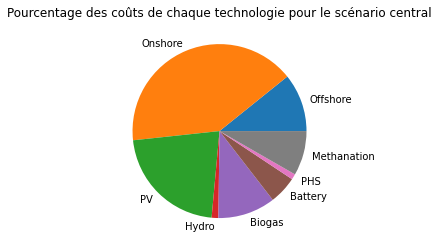

In [4]:
plt.figure()
plt.pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen]))), labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"])
plt.title("Pourcentage des coûts de chaque technologie pour le scénario central")
plt.show()

#### Influence du coût de l'éolien offshore

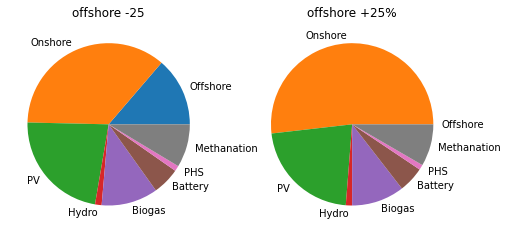

In [5]:
scen1 = 112  #offshore -25%
scen2 = 202  #offshore +25%
fig, axs = plt.subplots(1,2, figsize=(8,8))
axs[0].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen1]))), labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"])
axs[0].set_title('offshore -25')
axs[1].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen2]))), labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"])
axs[1].set_title('offshore +25%')
plt.show()

Même si le prix de l'éolien maritime diminue, ce ne sera pas suffisant pour que le mix diffère de façon important du mix de référence (157).  
Si l'éolien offshore a un prix plus élevé alors il va disparaitre du mix énergétique car trop coûteux.

#### Influence du coût du solaire

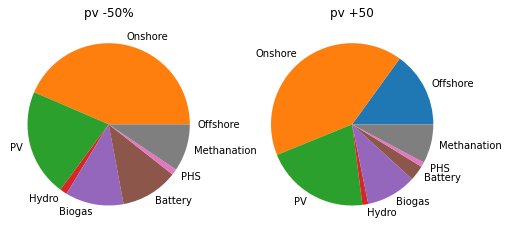

In [6]:
scen1 = 139  #pv -50%
scen2 = 175  #pv +50%
fig, axs = plt.subplots(1,2, figsize=(8,8))
axs[0].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen1]))), labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"])
axs[0].set_title('pv -50%')
axs[1].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen2]))), labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"])
axs[1].set_title('pv +50')
plt.show()

Avec une plus grande part de panneaux solaires (car moins cher) on n'a pas d'éolien offshore. Il nous faut plus de biogas pour compenser la perte du offshore. On remarque également une forte augmentation des batteries comme moyen de stockage : l'éolien terrestre est plus intermittant que l'éolien offshore.

On remarque que si une technologie a un prix plus faible alors l'offshore a tendance a disparaitre mais si on augmente le prix d'un technologie alors il va reprendre une part importante du mix. La présence du offshore fait diminuer le besoin en batteries.

#### Influence du coût de l'éolien terrestre

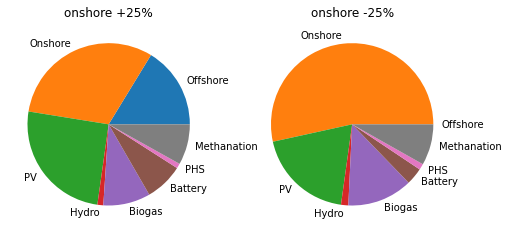

In [7]:
scen1 = 247  #onshore +25%
scen2 = 67   #onshore -25%
fig, axs = plt.subplots(1,2, figsize=(8,8))
axs[0].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen1]))), labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"])
axs[0].set_title('onshore +25%')
axs[1].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen2]))), labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"])
axs[1].set_title('onshore -25%')
plt.show()

Même en augmentant le prix de l'éolien onshore, on lui consacre encore une grande part dans le mix, probablement car les techologies offshore restent chers.  
Pareil que pour la diminuation du prix des panneaux solaires, l'éolien offshore disparait et est remplacé par la technologie dont le prix a diminué : éolien onshore. La différence lorsque le solaire a une part moins importante dans le mix est le besoin en batteries qui est plus faible et compensé par le biogas.

### 1.2. Variation du coût des technologies de stockage : batteries et méthanation 

#### Influence du coût des batteries

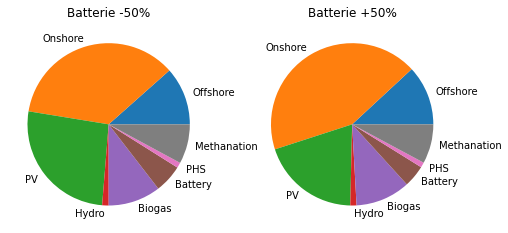

In [8]:
scen1 = 154  #batterie -50%
scen2 = 160  #batterie +50%
fig, axs = plt.subplots(1,2, figsize=(8,8))
axs[0].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen1]))), labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"])
axs[0].set_title('Batterie -50%')
axs[1].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen2]))), labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"])
axs[1].set_title('Batterie +50%')
plt.show()

Même avec un forte augmentation du prix des batteries sa part dans le mix reste importante (autant que dans le scénario central). On remarque que le solaire nécessite plus de stockage par batterie que l'éolien onshore c'est pour cela que la part de ce dernier augmente lors d'une augmentation du prix des batteries.

#### Influence du coût de la méthanation

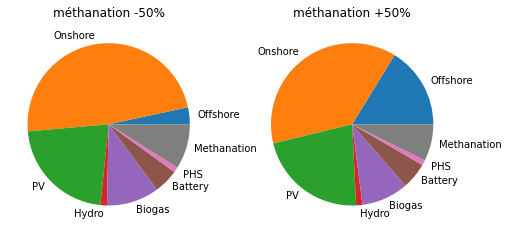

In [9]:
scen1 = 156  #méthanation -50%
scen2 = 158  #méthanation +50%
fig, axs = plt.subplots(1,2, figsize=(8,8))
axs[0].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen1]))), labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"])
axs[0].set_title('méthanation -50%')
axs[1].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen2]))), labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"])
axs[1].set_title('méthanation +50%')
plt.show()

Avec un coût de la méthanation plus faible, la technologie offshore diminue pour laisser plus au onshore car moins cher mais avec un besoin de stockage plus important. Avec un coût plus élevé on observe le phénomène inverse.

### 1.3. Variations croisées du coût des technologies de stockage et génératrices.

Dans cette partie j'ai essayé de simuler des scénarios extrêmes selon les interprétations des deux parties précédentes. En modifiant simultanément les coûts des technologies génératrices et de stockage notamment dans les pires cas :  
- le coût des stockages augmente et le coût du offshore aussi 
- le coût des stockages augmente et le coût des pv et du onshore aussi

et des cas particuliers :
- le coût du stockage augmente mais le coût du offshore diminue (on aurait tendance à penser que la part du offshore va fortement augmenter et ce n'est pas le cas)
- le coût du stockage diminue mais le coût des pv et onshore augmente (part des pv plus importante)
- tout augmente (un peu plus de offshore)
- tout diminue (un peu plus de pv)
- le coût des technologies génératrices augmente et le coût du stockage diminue (pareil)
- le coût des technologies génératrices diminue et le coût du stockage augmente (+ pv et onshore - offshore)

Globalement, les tests croisés ne m'ont pas permis de voir émerger une nouvelle tendance. Les conclusions précédentes sont confirmées. 

## 2. Analyse des autres sorties :

#### 2.1. Résultats robustes vs résultats sensibles

In [10]:
sens = pd.read_csv("outputs/sensitivity results.csv")
robus = pd.read_csv("outputs/robustness results.csv")

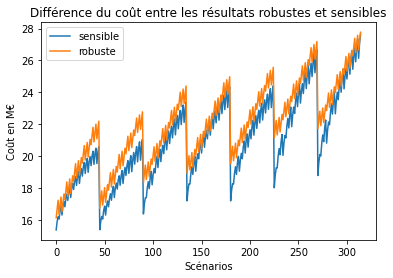

In [11]:
plt.plot(sens['cost'], label='sensible')
plt.plot(robus['cost'], label='robuste')
plt.title('Différence du coût entre les résultats robustes et sensibles')
plt.xlabel('Scénarios')
plt.ylabel('Coût en M€')
plt.legend()

Les résultats robustes donnent des coûts plus élevés que les résultats "sensibles".

#### 2.2 Résultats sur l'année 2006

In [12]:
scen2006 = pd.read_csv("outputs/real CF after internalization of LC/2006_LC_internalized.csv", index_col = "hour")
scen2006.columns = ['offshore', 'onshore', 'pv', 'river', 'lake', 'biogas', 'gas', 'phs',
                    'battery', 'methanation', 'Electricity demand', 'Storage phs', 'Storage battery', 
                    'Storage methanation','Stored battery', 'Stored phs', 'Stored methanation', 
                    'elec_price', 'gas_price']

In [13]:
months = pd.read_csv("inputs/months.csv")
df_mask = months['1']=='11'
#filtered_df = months[df_mask]
#filtered_df
#df_mask
#months
months = months[:8784]
months.columns = ['hour', 'month']
months.query('month==2')

,hour,month
743,744,2
744,745,2
745,746,2
746,747,2
747,748,2
...,...,...
1434,1435,2
1435,1436,2
1436,1437,2
1437,1438,2


#### Demande et production d'électricité en 2016

#### Evolution de la production des vre sur l'annéee 2016

#### Evolution du stockage des différentes technologies sur l'annéee 2016

#### Prix de l'électricité et du gaz